# Interval Statistic
Interval statistic is library to calculate interval estimations of an average and a variance.

There are several algorithms to estimate an average:

- by known variance
- by unknown variance
- by mena absolute deviation
- by interquartile width

There are several algorithms to estimate a variance:

- by confidence probability
- by mena absolute deviation
- by variance point estimation

Load Libraries

In [105]:
using IntervalStatistic
using Distributions
srand(10)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1007524736,1073256705,415953332,1072893275,-601364280,1073193666,-1335760268,1072926448,1521827180,1073499520  …  -439825479,1072978026,-411693740,1073111955,-1611334130,1963385220,236575170,-789052601,382,0]),[1.11258,1.36831,1.34445,1.05665,1.12078,1.17957,1.38181,1.8151,1.24221,1.81978  …  1.65822,1.49011,1.00684,1.42501,1.56311,1.52724,1.45901,1.55851,1.96219,1.38824],382,UInt32[0x0000000a])

Generate samples of normal distribution

In [106]:
d = Normal()
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

0.07504936078705886

In [107]:
result_by_known_variance = IntervalStatistic.Average.byKnownVariance(
    average, sigma*sigma, confidence_probability, length
)
println(result_by_known_variance)

[-0.120948, 0.271046]


In [108]:
result_by_inter_quartile_width = IntervalStatistic.Average.byInterQuartileWidth(
    values, confidence_probability, length
)
println(result_by_inter_quartile_width)

[-0.144696, 0.109761]


In [109]:
result_by_unknown_variance = IntervalStatistic.Average.byUnknownVariance(
    average, values, confidence_probability, length
)
println(result_by_unknown_variance)

[-0.0959839, 0.246083]


In [110]:
using Plots
pyplot(reuse=true)

Plots.PyPlotBackend()


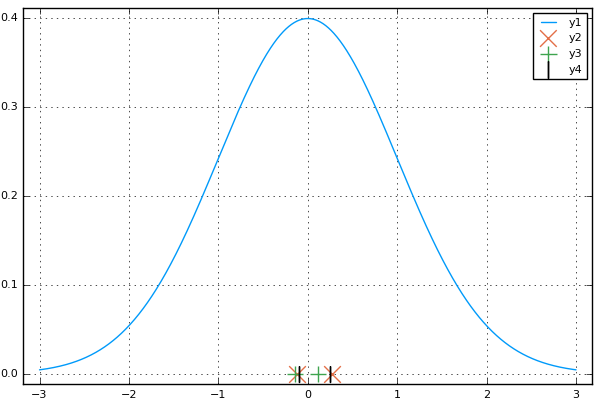

In [111]:
X = linspace(-3, 3, 1000)
plot(X, (x) -> pdf(d, x))
X_mean_by_known_variance = linspace(result_by_known_variance.lo, result_by_known_variance.hi, 2)
scatter!(X_mean_by_known_variance, (x) -> 0; marker=(1,[:x],12))
X_mean_by_inter_quartile_width = linspace(result_by_inter_quartile_width.lo, result_by_inter_quartile_width.hi, 2)
scatter!(X_mean_by_inter_quartile_width, (x) -> 0; marker=(1,[:+], 12))
X_mean_by_unknown_variance = linspace(result_by_unknown_variance.lo, result_by_unknown_variance.hi, 2)
scatter!(X_mean_by_unknown_variance, (x) -> 0; marker=(1,[:vline],12))

Generate samples of normal distribution with mu=100 sigma=4

In [112]:
d = Normal(100, 4)
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

99.73470493027047

In [113]:
result_by_known_variance = IntervalStatistic.Average.byKnownVariance(
    average, sigma*sigma, confidence_probability, length
)
println(result_by_known_variance)

[98.9507, 100.519]


In [114]:
result_by_inter_quartile_width = IntervalStatistic.Average.byInterQuartileWidth(
    values, confidence_probability, length
)
println(result_by_inter_quartile_width)

[99.3988, 100.533]


In [115]:
result_by_unknown_variance = IntervalStatistic.Average.byUnknownVariance(
    average, values, confidence_probability, length
)
println(result_by_unknown_variance)

[99.004, 100.466]



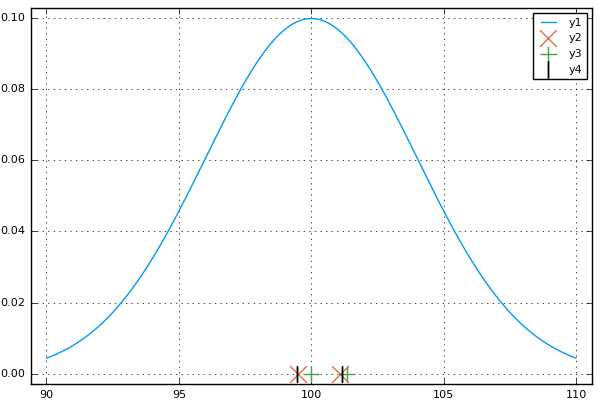

In [104]:
X = linspace(90, 110, 1000)
plot(X, (x) -> pdf(d, x))
X_mean_by_known_variance = linspace(result_by_known_variance.lo, result_by_known_variance.hi, 2)
scatter!(X_mean_by_known_variance, (x) -> 0; marker=(1,[:x],12))
X_mean_by_inter_quartile_width = linspace(result_by_inter_quartile_width.lo, result_by_inter_quartile_width.hi, 2)
scatter!(X_mean_by_inter_quartile_width, (x) -> 0; marker=(1,[:+], 12))
X_mean_by_unknown_variance = linspace(result_by_unknown_variance.lo, result_by_unknown_variance.hi, 2)
scatter!(X_mean_by_unknown_variance, (x) -> 0; marker=(1,[:vline],12))